<h1>NETFLIX DATASET ANALYSIS



# Objectives

- Compare how many movies vs TV shows Netflix has over the years.
- Track which genres have become more or less popular over time.
- Do highly rated titles get more votes?
- Are there underrated or overrated shows?
- Show top 3–5 rated titles for each genre.
- Visualize which genres consistently perform well.
- Rating by Types
- Rating over Years



# Importing Libraries


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [138]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Nataflix Analysis/data.csv')

# Basic Dataset Exploration

In [139]:
df.shape

(21452, 8)

In [140]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9122.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7937.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2369669.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1246228.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,525637.0,NaN


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21452 entries, 0 to 21451
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               20736 non-null  object 
 1   type                21452 non-null  object 
 2   genres              21080 non-null  object 
 3   releaseYear         21410 non-null  float64
 4   imdbId              19842 non-null  object 
 5   imdbAverageRating   19652 non-null  float64
 6   imdbNumVotes        19652 non-null  float64
 7   availableCountries  161 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [142]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,21410.000000,19652.000000,1.965200e+04
mean,2013.296450,6.402081,3.210860e+04
std,14.304793,1.091964,1.215479e+05
min,1913.000000,1.200000,5.000000e+00
25%,2011.000000,5.800000,3.310000e+02
50%,2018.000000,6.500000,1.612000e+03
75%,2022.000000,7.200000,1.032650e+04
max,2027.000000,9.800000,3.032329e+06


In [143]:
(df.isnull().sum()/df.shape[0])*100

,0
title,3.337684
type,0.000000
genres,1.734104
releaseYear,0.195786
imdbId,7.505128
imdbAverageRating,8.390826
imdbNumVotes,8.390826
availableCountries,99.249487


In [144]:
df[df.duplicated()]

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
16187,Kevin Hart: The Kennedy Center Mark Twain Priz...,movie,Comedy,2024.0,tt31805297,6.6,800.0,NaN
16210,One Piece Fan Letter,movie,"Action, Adventure, Animation",2024.0,tt33998607,9.2,18973.0,NaN
16647,NaN,tv,NaN,2008.0,NaN,NaN,NaN,NaN
16919,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN
17630,NaN,tv,Comedy,2017.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21442,NaN,tv,NaN,2018.0,NaN,NaN,NaN,NaN
21444,NaN,tv,"Animation, Kids",2024.0,NaN,NaN,NaN,NaN
21445,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN
21446,NaN,tv,NaN,2020.0,NaN,NaN,NaN,NaN


# Handling Missing Values and Removing Duplicates
- Removing `availableCountries` as it has 99% missing values
- Removing missing values of `title` and `imdbId` as they important columns

In [145]:
df.drop('availableCountries', axis=1, inplace=True)

In [146]:
df.dropna(subset=['title','imdbId'],inplace=True)

In [147]:
(df.isnull().sum()/df.shape[0])*100

,0
title,0.000000
type,0.000000
genres,0.010080
releaseYear,0.005040
imdbId,0.000000
imdbAverageRating,0.957565
imdbNumVotes,0.957565


In [148]:
df.drop_duplicates(inplace=True)

## Filling genres with `Unknown`

In [149]:
df['genres'].fillna('Unknown',inplace=True)

# Analyzing Content Type Distribution and Genre Trends

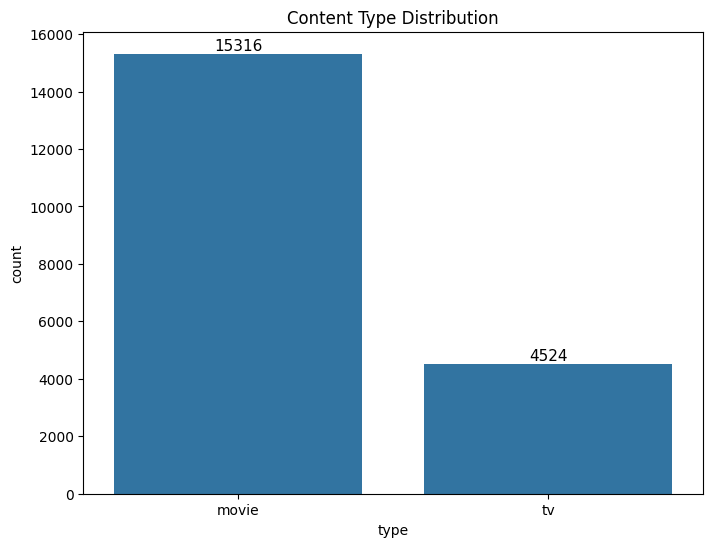

In [150]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df,x='type')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=11)
plt.title('Content Type Distribution')
plt.show()

In [151]:
df1 = df.copy()

In [152]:
df1['genres']=df1['genres'].str.split(',')

In [153]:
df1_exploded = df1.explode('genres')

In [154]:
df1_exploded['genres'] = df1_exploded['genres'].str.strip()


In [155]:
df1_trend = df1_exploded.groupby(['genres']).size().sort_values(ascending=False).reset_index(name='count')

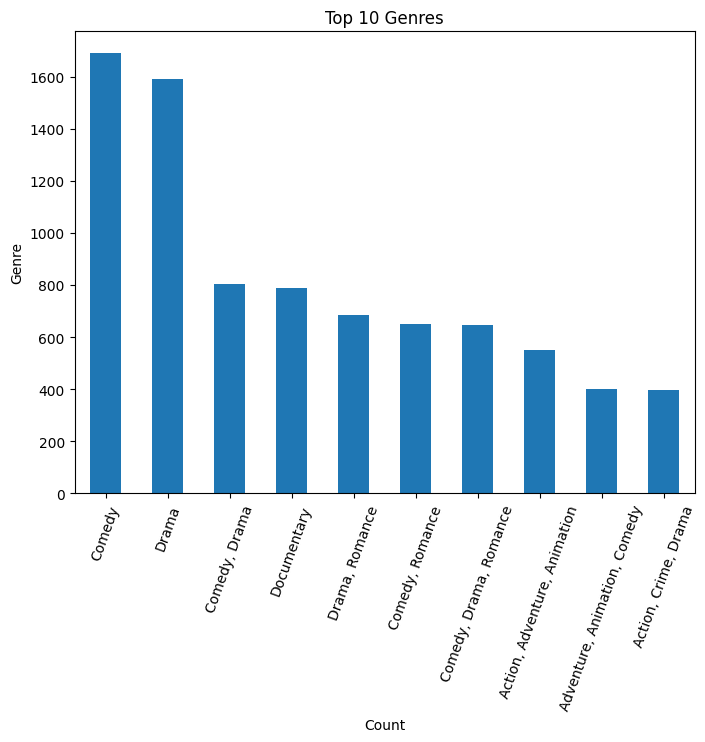

In [156]:
top_10_genres = df['genres'].value_counts().head(10)
plt.figure(figsize=(8,6))
top_10_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation=70)
plt.show()

##Below graph shows that Mostly movies that Netflix has are Drama and Comedy

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Animation'),
  Text(9, 0, 'Mystery'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Family'),
  Text(12, 0, 'Fantasy'),
  Text(13, 0, 'Biography'),
  Text(14, 0, 'History'),
  Text(15, 0, 'Music'),
  Text(16, 0, 'Sci-Fi'),
  Text(17, 0, 'Sport'),
  Text(18, 0, 'Reality-TV'),
  Text(19, 0, 'War'),
  Text(20, 0, 'Short'),
  Text(21, 0, 'Musical'),
  Text(22, 0, 'Game-Show'),
  Text(23, 0, 'Western'),
  Text(24, 0, 'Talk-Show'),
  Text(25, 0, 'Film-Noir'),
  Text(26, 0, 'News'),
  Text(27, 0, 'Adult'),
  Text(28, 0, 'Action & Adventure'),
  Text(29, 0, 'Unknown')])

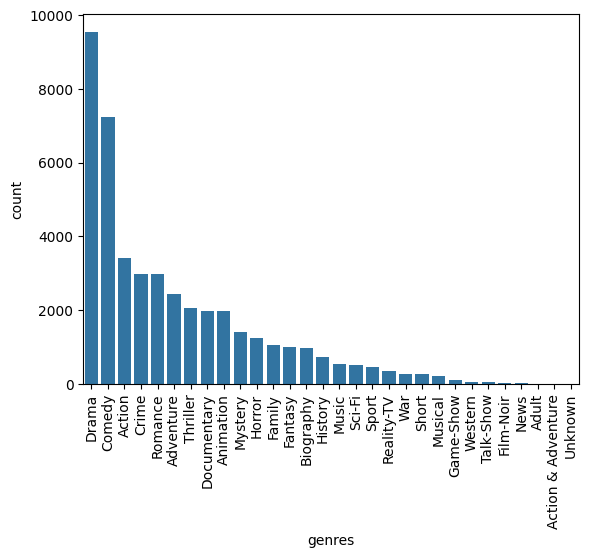

In [157]:
sns.barplot(x=df1_trend['genres'],y=df1_trend['count'])
plt.xticks(rotation=90)

# Relationship Between IMDb Ratings and Votes

* Do highly rated titles get more votes?

  **Ans** Yes, Some high rated titles gets lot of votes like The Dark Knight,Inception

* Are there underrated or overrated shows?

  **Ans** Yes so many movies or shows are overrated rated as they less votes and high rating

In [158]:
df.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,1
imdbId,0
imdbAverageRating,190
imdbNumVotes,190


In [159]:
df2 = df.copy()

In [160]:
df2.dropna(inplace=True)

In [161]:
cols = df2.select_dtypes(include=np.number).columns

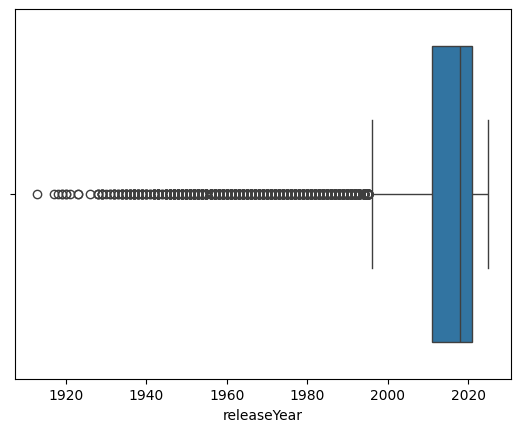

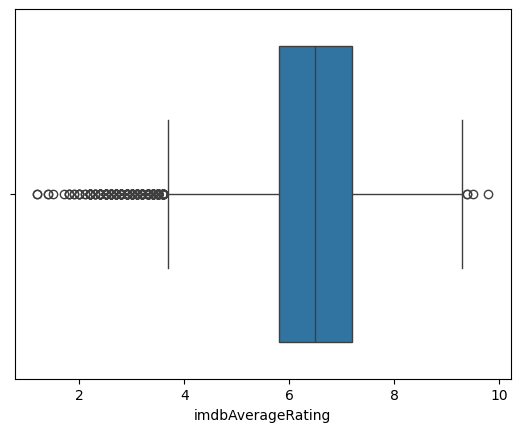

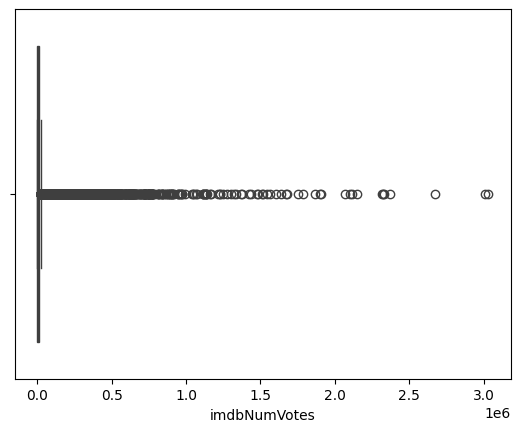

In [162]:
for col in cols:
  sns.boxplot(data=df2,x=col)
  plt.show()

In [163]:
df2[df2['imdbNumVotes'] > 2500000]

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes
55,The Dark Knight,movie,"Action, Crime, Drama",2008.0,tt0468569,9.0,3008904.0
81,The Shawshank Redemption,movie,Drama,1994.0,tt0111161,9.3,3032329.0
1797,Inception,movie,"Action, Adventure, Sci-Fi",2010.0,tt1375666,8.8,2672591.0


<Axes: xlabel='imdbAverageRating', ylabel='imdbNumVotes'>

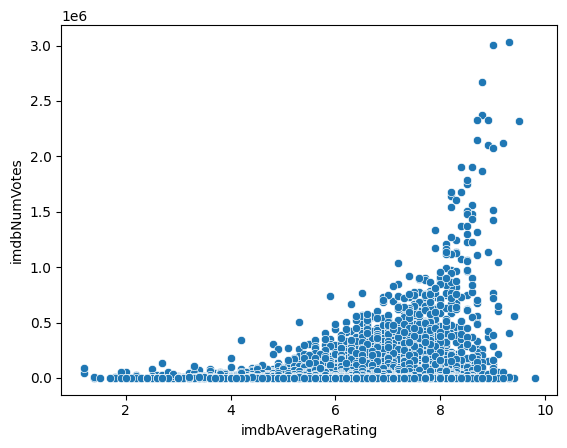

In [164]:
sns.scatterplot(data=df2,x='imdbAverageRating',y='imdbNumVotes')

# Identify Top-Rated Content by Genre
* Show top 3–5 rated titles for each genre.

  **Ans** Mostly Drama Movies or shows are highly rated

In [165]:
df1_exploded.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes
0,Ariel,movie,Comedy,1988.0,tt0094675,7.4,9122.0
0,Ariel,movie,Crime,1988.0,tt0094675,7.4,9122.0
0,Ariel,movie,Romance,1988.0,tt0094675,7.4,9122.0
1,Shadows in Paradise,movie,Comedy,1986.0,tt0092149,7.4,7937.0
1,Shadows in Paradise,movie,Drama,1986.0,tt0092149,7.4,7937.0


In [166]:
df2_exploded = df1_exploded.dropna()

In [167]:
df2_sorted = df2_exploded.sort_values(by=['genres', 'imdbAverageRating'], ascending=[True, False])


In [168]:
df2_sorted

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes
16318,Band of Brothers,tv,Action,2001.0,tt0185906,9.4,559333.0
16218,Avatar: The Last Airbender,tv,Action,2005.0,tt0417299,9.3,403535.0
16193,One Piece Fan Letter,movie,Action,2024.0,tt33998607,9.2,18973.0
16004,Losing Lerato 2,movie,Action,2024.0,tt33095169,9.1,33.0
16254,Attack on Titan,tv,Action,2013.0,tt2560140,9.1,601884.0
...,...,...,...,...,...,...,...
11885,Magnesium,movie,Western,2020.0,tt10792570,5.1,707.0
19136,Django,tv,Western,2022.0,tt14084828,4.7,1758.0
9931,Hell on the Border,movie,Western,2019.0,tt8652584,4.6,2193.0
3181,Summer Love,movie,Western,2006.0,tt0486020,3.5,590.0


In [169]:
top5_by_genre = df2_sorted.groupby('genres').head(5)

In [170]:
for genre, group in top5_by_genre.groupby('genres'):
    print(f"\nTop 5 titles for genre: {genre}")
    print(group[['title', 'imdbAverageRating']])


Top 5 titles for genre: Action
                            title  imdbAverageRating
16318            Band of Brothers                9.4
16218  Avatar: The Last Airbender                9.3
16193        One Piece Fan Letter                9.2
16004             Losing Lerato 2                9.1
16254             Attack on Titan                9.1

Top 5 titles for genre: Action & Adventure
            title  imdbAverageRating
21308  Reddo burû                7.7

Top 5 titles for genre: Adult
                                title  imdbAverageRating
12238  Bad Luck Banging or Loony Porn                6.5

Top 5 titles for genre: Adventure
                                  title  imdbAverageRating
16218        Avatar: The Last Airbender                9.3
16193              One Piece Fan Letter                9.2
16254                   Attack on Titan                9.1
16488  Fullmetal Alchemist: Brotherhood                9.1
16967                    Rick and Morty                9.

# IMDB Rating by Type

In [171]:
df4 = df.copy()

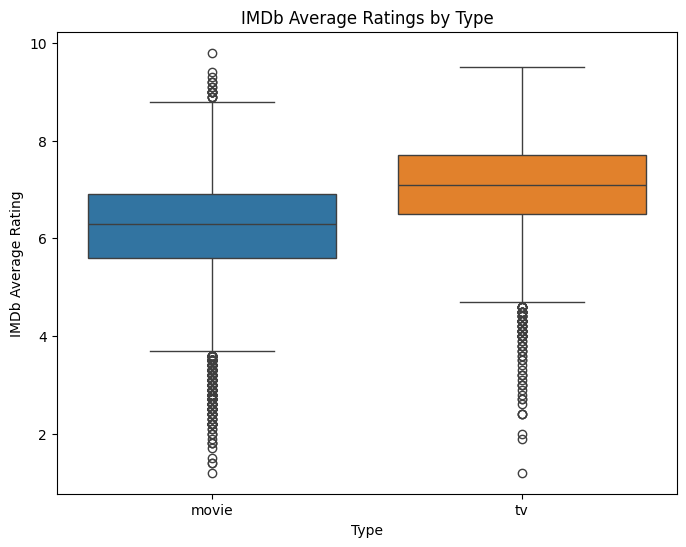

In [172]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df4,x='type',y='imdbAverageRating',hue='type')
plt.title('IMDb Average Ratings by Type')
plt.xlabel('Type')
plt.ylabel('IMDb Average Rating')
plt.show()

# IMDB Rating Over Years

In [173]:
df4['year'] = pd.to_datetime(df4['releaseYear']).dt.year

In [174]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19840 entries, 0 to 21450
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              19840 non-null  object 
 1   type               19840 non-null  object 
 2   genres             19840 non-null  object 
 3   releaseYear        19839 non-null  float64
 4   imdbId             19840 non-null  object 
 5   imdbAverageRating  19650 non-null  float64
 6   imdbNumVotes       19650 non-null  float64
 7   year               19839 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


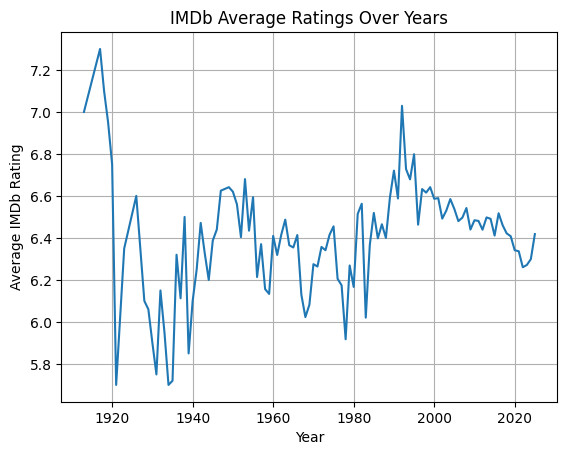

In [175]:

df_avg = df4.groupby(['releaseYear'])['imdbAverageRating'].mean()
sns.lineplot(data=df_avg)
plt.title('IMDb Average Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()
